<center><h1>Pre-Processing of DataSet</h1></center>

In [4]:
import pandas as pd

In [6]:
data = pd.read_csv("C:\\AI-ML\\MLProject\\Data\\cardio_train.csv" , sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<h3>Removing useless columns</h3>

In [9]:
data.drop(columns=['id'], inplace=True)

In [11]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
data = data.drop_duplicates()

In [15]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [17]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

outlier_columns = ['height', 'weight', 'ap_hi', 'ap_lo', 'age']
for col in outlier_columns:
    outliers = detect_outliers(data, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in height: 519
Outliers in weight: 1819
Outliers in ap_hi: 1435
Outliers in ap_lo: 4632
Outliers in age: 4


In [19]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[column] = df[column].clip(lower, upper)

for col in outlier_columns:
    cap_outliers(data, col)
data.describe()

C:\Users\er_dh\AppData\Local\Temp\ipykernel_18880\231996978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower, upper)
C:\Users\er_dh\AppData\Local\Temp\ipykernel_18880\231996978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower, upper)
C:\Users\er_dh\AppData\Local\Temp\ipykernel_18880\231996978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19469.024137,1.349648,164.407118,73.928410,126.714774,81.780253,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.136191,0.476862,7.826740,13.443679,16.388214,9.064089,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,12169.500000,1.000000,142.500000,39.500000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,186.500000,107.500000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data['age_years'] = (data['age'] / 365).astype(int)
data.drop('age', axis=1, inplace=True)
data.head()

C:\Users\er_dh\AppData\Local\Temp\ipykernel_18880\2307171872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_years'] = (data['age'] / 365).astype(int)
C:\Users\er_dh\AppData\Local\Temp\ipykernel_18880\2307171872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('age', axis=1, inplace=True)


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168.0,62.0,110,80,1,1,0,0,1,0,50
1,1,156.0,85.0,140,90,3,1,0,0,1,1,55
2,1,165.0,64.0,130,70,3,1,0,0,0,1,51
3,2,169.0,82.0,150,100,1,1,0,0,1,1,48
4,1,156.0,56.0,100,65,1,1,0,0,0,0,47


In [23]:
data['BMI'] = data['weight'] / ( (data['height']/100) ** 2 )
data.head()

C:\Users\er_dh\AppData\Local\Temp\ipykernel_18880\4131800804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI'] = data['weight'] / ( (data['height']/100) ** 2 )


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,2,168.0,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156.0,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165.0,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169.0,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156.0,56.0,100,65,1,1,0,0,0,0,47,23.011177


<h3>Fixing Blood Pressure lines</h3>

In [27]:
data = data[(data['ap_hi'] > data['ap_lo'])]
data = data[(data['ap_hi'] >= 70) & (data['ap_hi'] <= 250)]
data = data[(data['ap_lo'] >= 40) & (data['ap_lo'] <= 200)]


data

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,2,168.0,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156.0,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165.0,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169.0,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156.0,56.0,100,65,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168.0,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,1,158.0,107.5,140,90,2,2,0,0,1,1,61,43.062009
69997,2,183.0,105.0,170,90,3,1,0,1,0,1,52,31.353579
69998,1,163.0,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = ['height','weight','ap_hi','ap_lo','BMI']
data[scale_cols] = scaler.fit_transform(data[scale_cols])
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,2,0.459259,-0.886891,-1.029065,-0.192660,1,1,0,0,1,0,50,-1.096396
1,1,-1.074392,0.824150,0.809288,0.915347,3,1,0,0,1,1,55,1.525100
2,1,0.075846,-0.738105,0.196504,-1.300667,3,1,0,0,0,1,51,-0.784766
3,2,0.587063,0.600971,1.422073,2.023354,1,1,0,0,1,1,48,0.267564
4,1,-1.074392,-1.333250,-1.641850,-1.854671,1,1,0,0,0,0,47,-0.885218


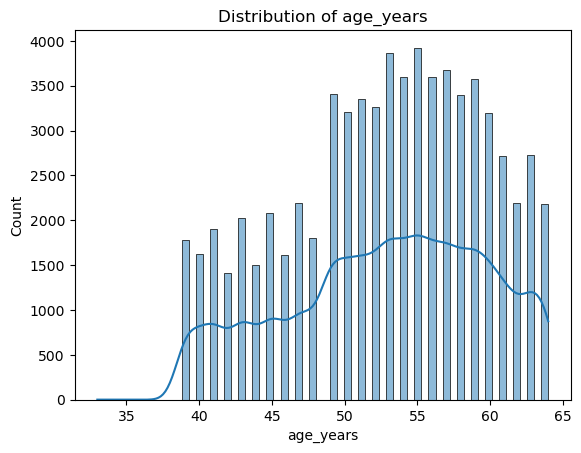

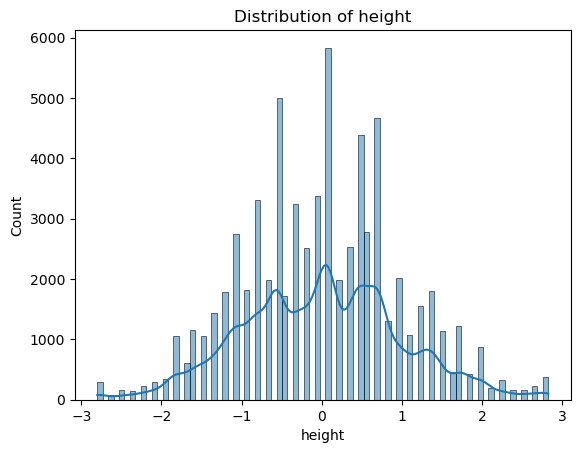

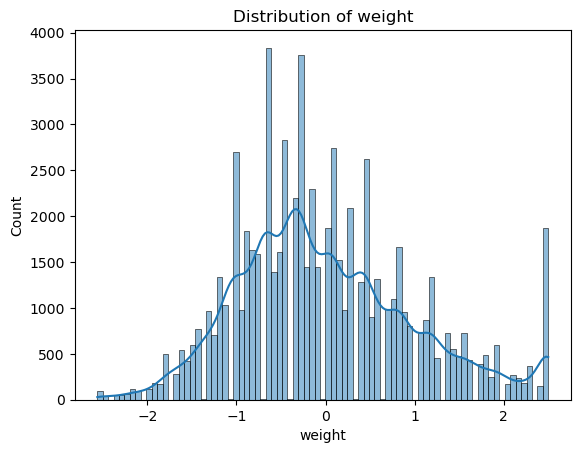

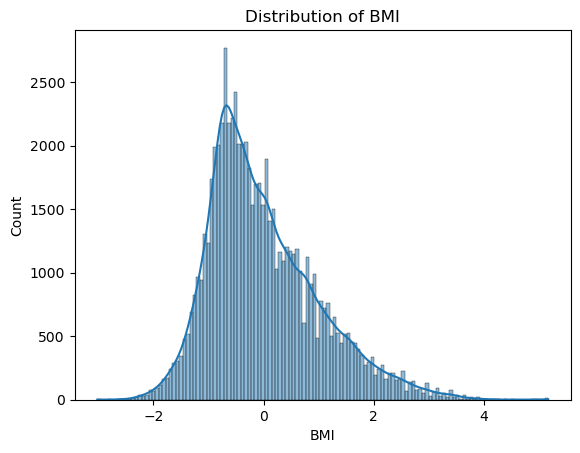

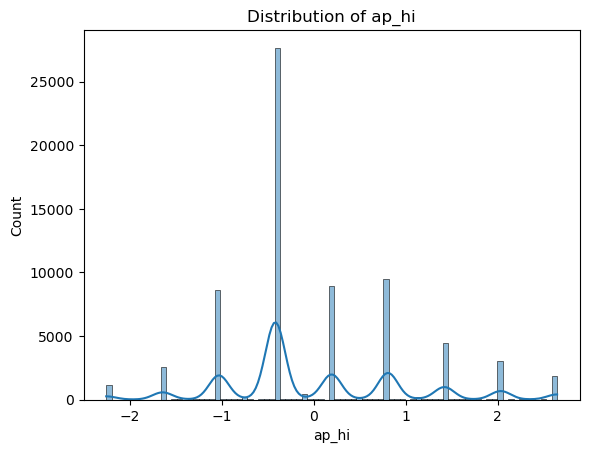

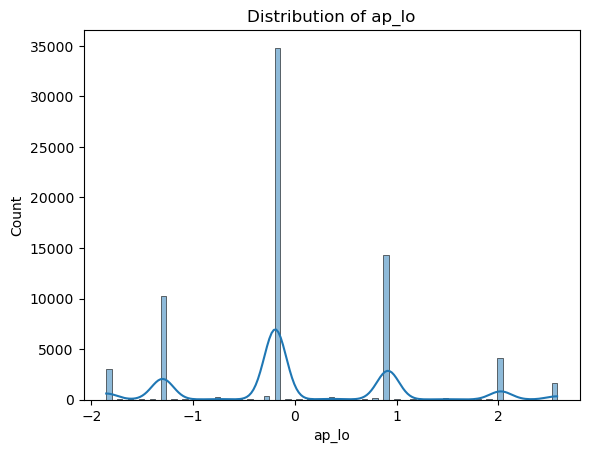

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age_years','height','weight','BMI','ap_hi','ap_lo']

for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

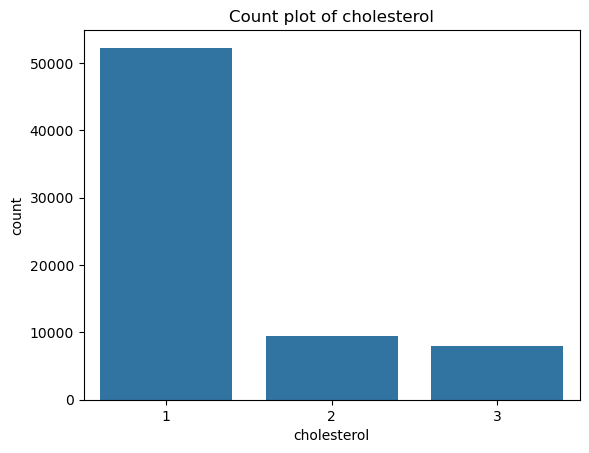

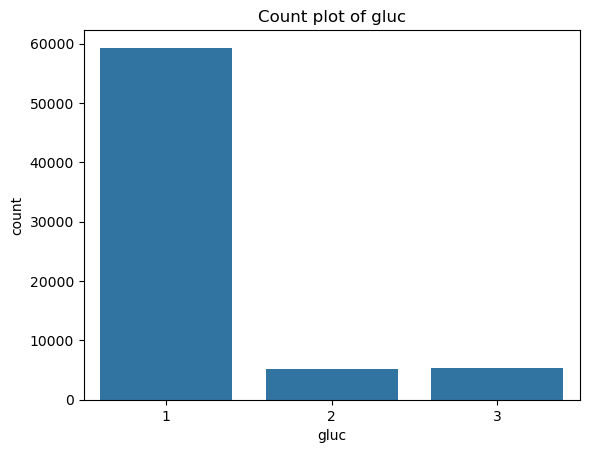

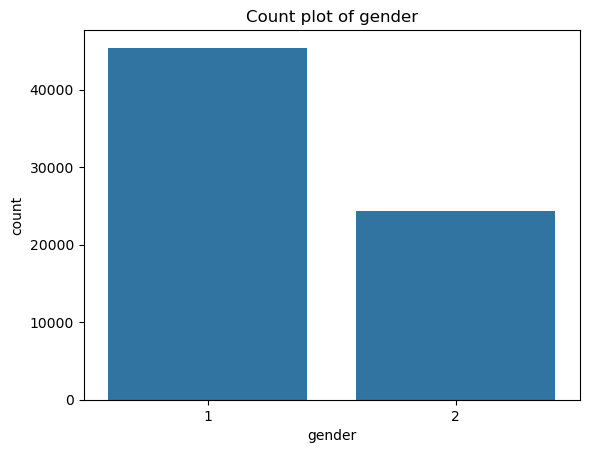

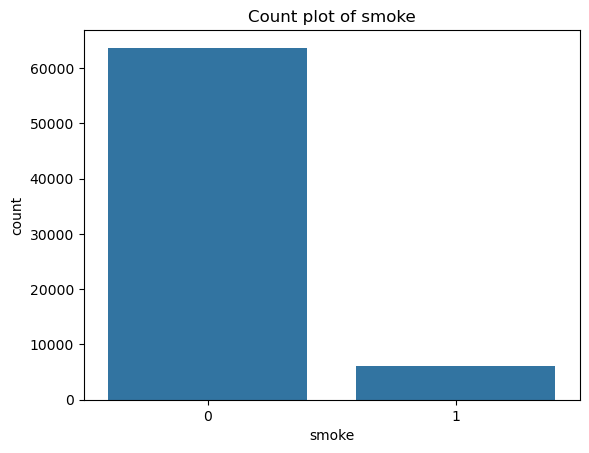

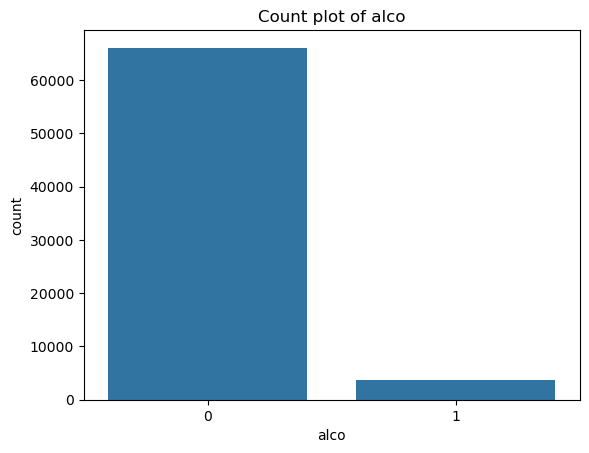

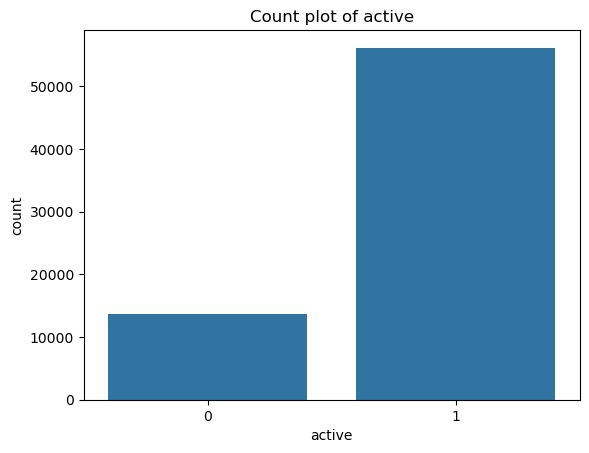

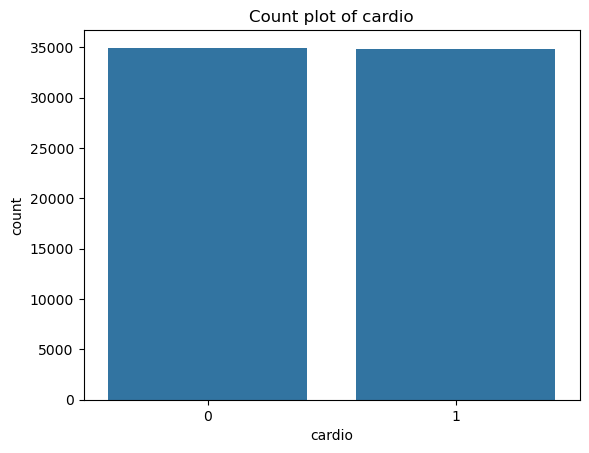

In [31]:
cat_cols = ['cholesterol','gluc','gender','smoke','alco','active','cardio']

for col in cat_cols:
    sns.countplot(x=data[col])
    plt.title(f"Count plot of {col}")
    plt.show()

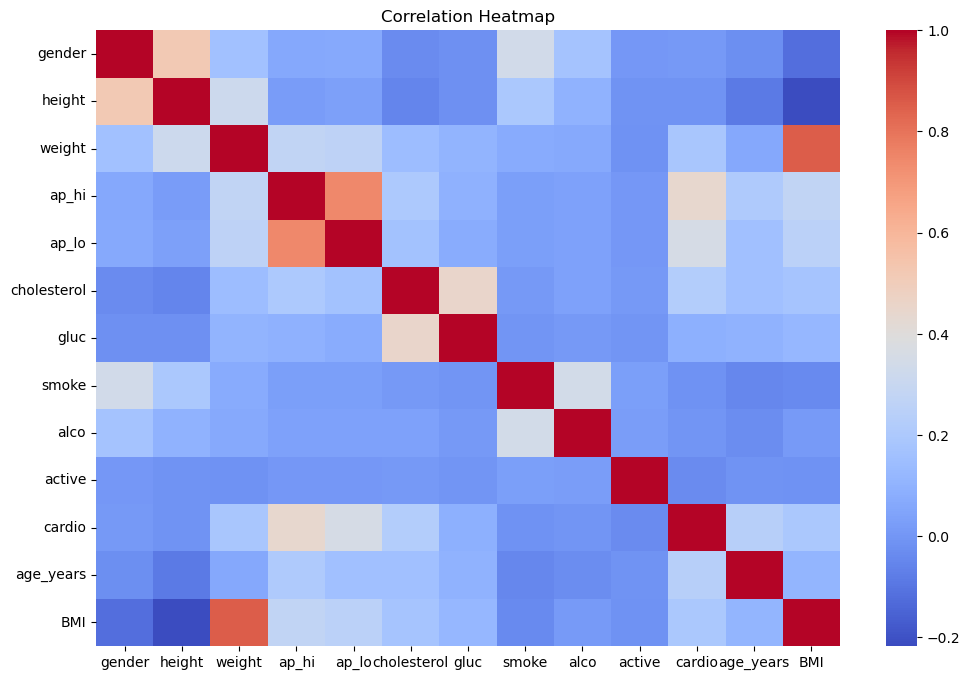

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

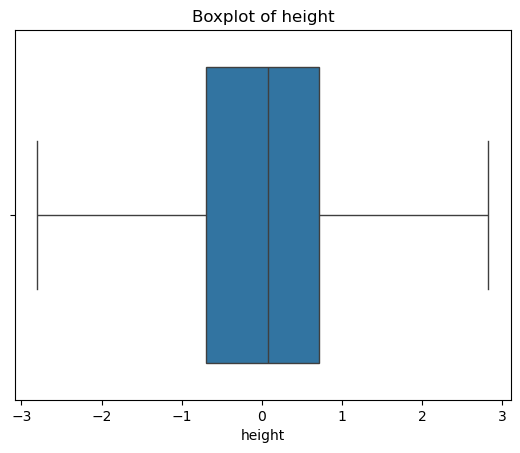

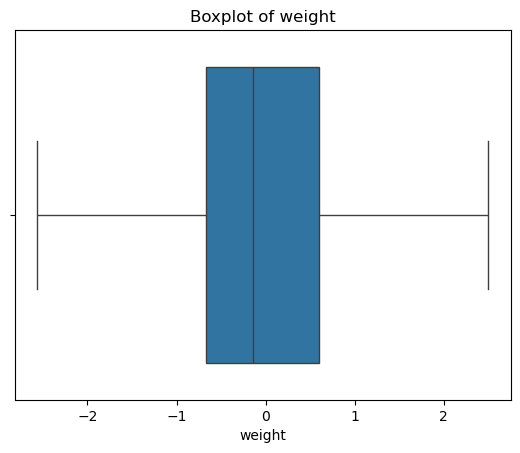

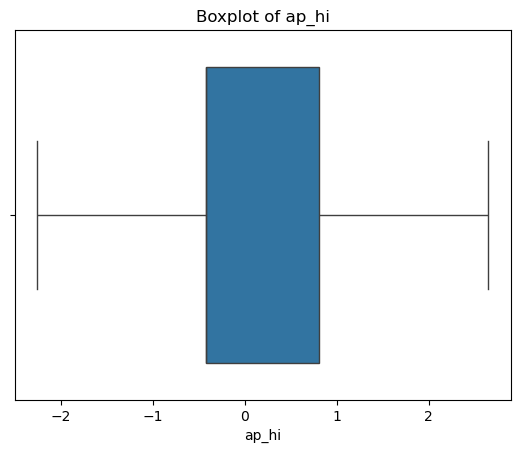

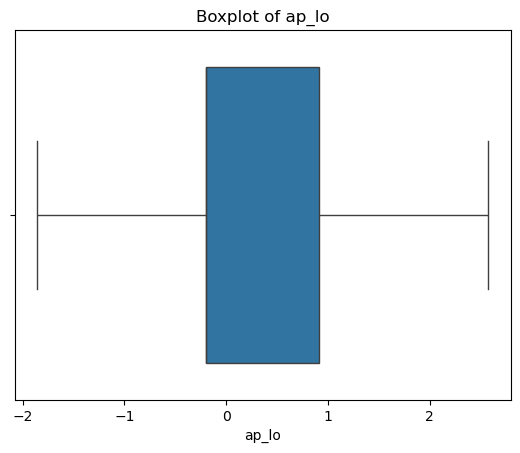

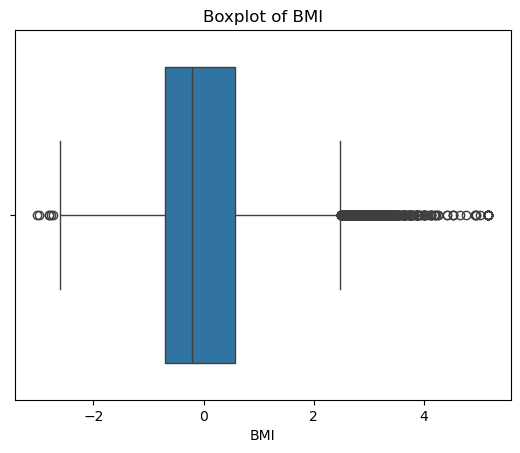

In [33]:
for col in ['height','weight','ap_hi','ap_lo','BMI']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [36]:
data.to_csv('preprocessed_data.csv')

In [42]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']